# Intro

## Load

In [1]:
import os, sys, pickle
import numpy as np
from tqdm.notebook import trange, tqdm

In [2]:
from tesste import tesste
from ppp import ppp

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


## Data

In [4]:
reports_folder='./reports/'

In [5]:
bp='5_BP_PLC/'
bp_files=os.listdir(reports_folder+bp)
bp_files.sort()

In [6]:
shell='1_Shell/'
shell_files=os.listdir(reports_folder+shell)
shell_files.sort()

In [7]:
bp_files=[sh for sh in bp_files if sh.endswith('.pdf')]

In [8]:
shell_files=[sh for sh in shell_files if sh.endswith('.pdf')]

# Comparing reports from the same company for different years

## BP

### Extract texts

In [9]:
bp_texts=[]
for bp_file in tqdm(bp_files):
    bp_texts.append(ppp(reports_folder+bp+bp_file))

  0%|          | 0/9 [00:00<?, ?it/s]

In [11]:
with open('./texts/bp.pickle','wb') as f:
    pickle.dump(bp_texts, f)

### Compare embeddings

In [13]:
with open('./texts/bp.pickle','rb') as f:
    bp_texts=pickle.load(f)

In [16]:
pvals=[]
cos_sims=[]
for i, present_text in enumerate(tqdm(bp_texts)):
    if i>0:
        former_text=bp_texts[i-1]
        cacca=tesste(former_text, present_text)
        cos_sims.append(cacca.cos_sim)
        pvals.append(cacca.pval)

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

/Users/fabio/Documents/Lavoro/PythonFiles/sdgs_py38/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2789: RuntimeWarning: invalid value encountered in scalar multiply
  Lhat = muhat - Shat*mu


  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

#### Save me!

In [17]:
bp_cspv={'cos_sims': cos_sims, 'pvals':pvals}

In [18]:
with open('./texts/bp_cspv.pickle','wb') as f:
    pickle.dump(bp_cspv, f)

In [19]:
print('ok!')

ok!


#### Plot

In [11]:
with open('./texts/bp_cspv.pickle','rb') as f:
    bp_cspv=pickle.load(f)

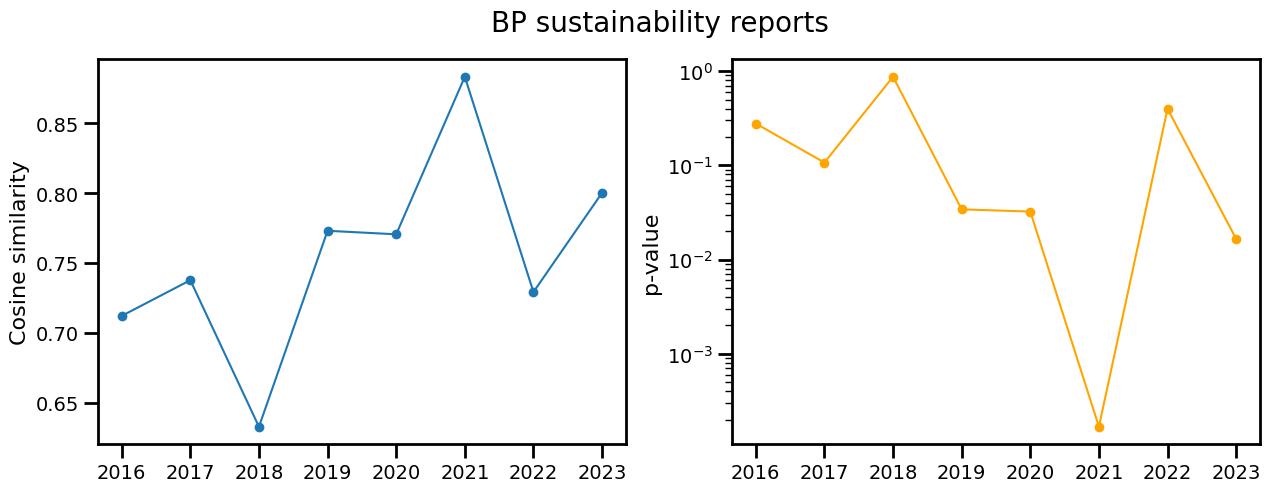

In [26]:
fig, axs=plt.subplots(1,2, figsize=(15,5))
x=range(2016, 2024)
axs[0].plot(x, bp_cspv['cos_sims'], marker='o')
axs[0].set_ylabel('Cosine similarity', fontsize=16)
axs[1].plot(x, bp_cspv['pvals'], marker='o', c='orange')
axs[1].set_ylabel('p-value', fontsize=16)
axs[1].set_yscale('log')
plt.suptitle('BP sustainability reports', fontsize=20)
plt.show()

## Shell

### Extract texts

In [12]:
shell_texts=[ppp(reports_folder+shell+shell_file) for shell_file in tqdm(shell_files)]

  0%|          | 0/9 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [15]:
with open('./texts/shell.pickle', 'wb') as f:
    pickle.dump(shell_texts, f)

### Compare embeddings

In [9]:
with open('./texts/shell.pickle','rb') as f:
    shell_texts=pickle.load(f)

In [ ]:
pvals=[]
cos_sims=[]
for i, present_text in enumerate(tqdm(shell_texts)):
    if i>0:
        former_text=shell_texts[i-1]
        cacca=tesste(former_text, present_text)
        cos_sims.append(cacca.cos_sim)
        pvals.append(cacca.pval)

  0%|          | 0/9 [00:00<?, ?it/s]

/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 10020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
/home/sarawalk/sdgs_py38/lib/python3.8/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings

  0%|          | 0/1000 [00:00<?, ?it/s]

#### Save me!

In [ ]:
shell_cspv={'cos_sims': cos_sims, 'pvals':pvals}

In [ ]:
with open('./texts/shell_cspv.pickle','wb') as f:
    pickle.dump(shell_cspv, f)

#### Plot

In [ ]:
with open('./texts/shell_cspv.pickle','rb') as f:
    shell_cspv=pickle.load(f)

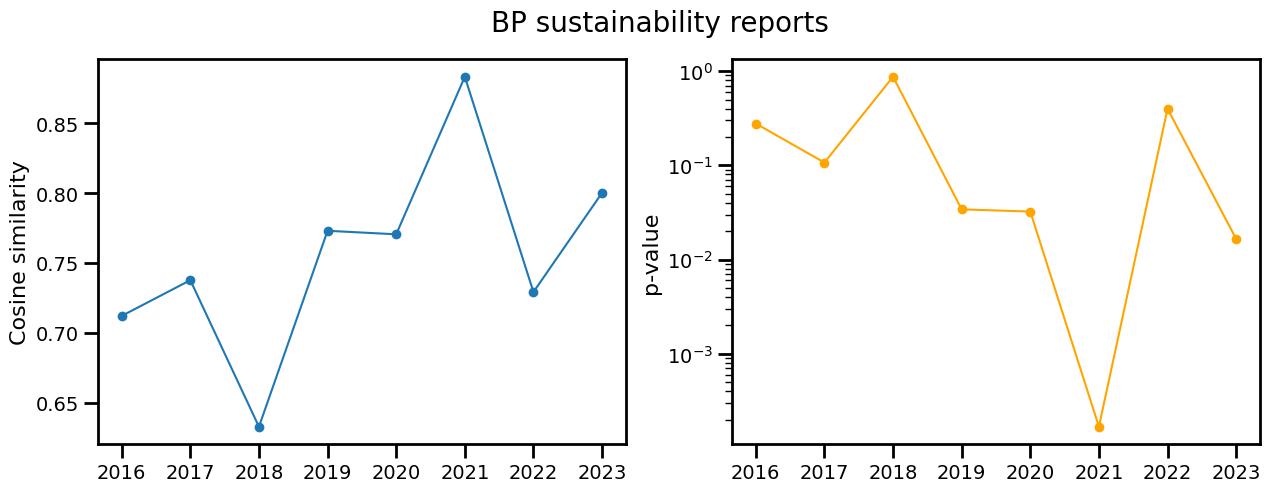

In [26]:
fig, axs=plt.sushelllots(1,2, figsize=(15,5))
x=range(2016, 2024)
axs[0].plot(x, shell_cspv['cos_sims'], marker='o')
axs[0].set_ylabel('Cosine similarity', fontsize=16)
axs[1].plot(x, shell_cspv['pvals'], marker='o', c='orange')
axs[1].set_ylabel('p-value', fontsize=16)
axs[1].set_yscale('log')
plt.suptitle('Shell sustainability reports', fontsize=20)
plt.show()